In [1]:
import tensorflow as tf
import  matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
obj_image=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [4]:
train_data=obj_image.flow_from_directory('Training',target_size=(64,64),batch_size=32,class_mode='binary')

Found 1648 images belonging to 2 classes.


In [5]:
train_data=obj_image.flow_from_directory('Training',target_size=(64,64),batch_size=32,class_mode='binary')

Found 1648 images belonging to 2 classes.


In [6]:
test_data=ImageDataGenerator(rescale=1./255)


In [7]:
test_data = test_data.flow_from_directory('Testing',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 215 images belonging to 2 classes.


In [10]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPool2D

from tensorflow.keras.regularizers import l2

In [11]:
# step -1 : Initialising the CNN
cnn = tf.keras.models.Sequential()

In [12]:
#step2 : Convulation layer
cnn.add(Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [13]:
#step :3 pooling
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [14]:
#2nd Convulation Layer
cnn.add(Conv2D(filters=32,padding="same",kernel_size=3, activation='relu'))

In [15]:
#pooling
cnn.add(MaxPool2D(pool_size=2, strides=2))

In [16]:
# Step 4: Flattening
cnn.add(tf.keras.layers.Flatten())

In [17]:
# Step 5 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [18]:
## for mulitclassification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))
#cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [20]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = train_data, validation_data = test_data, epochs = 9)

Epoch 1/9
52/52 [==============================] - 53s 938ms/step - loss: 0.9250 - accuracy: 0.5904 - val_loss: 0.8295 - val_accuracy: 0.5814
Epoch 2/9
52/52 [==============================] - 13s 245ms/step - loss: 0.7446 - accuracy: 0.6371 - val_loss: 1.2142 - val_accuracy: 0.6186
Epoch 3/9
52/52 [==============================] - 11s 209ms/step - loss: 0.6963 - accuracy: 0.6584 - val_loss: 1.4806 - val_accuracy: 0.5860
Epoch 4/9
52/52 [==============================] - 11s 206ms/step - loss: 0.6630 - accuracy: 0.6814 - val_loss: 1.0797 - val_accuracy: 0.6465
Epoch 5/9
52/52 [==============================] - 11s 202ms/step - loss: 0.5960 - accuracy: 0.7002 - val_loss: 1.2842 - val_accuracy: 0.6000
Epoch 6/9
52/52 [==============================] - 10s 187ms/step - loss: 0.5624 - accuracy: 0.7324 - val_loss: 1.3728 - val_accuracy: 0.6093
Epoch 7/9
52/52 [==============================] - 9s 176ms/step - loss: 0.4996 - accuracy: 0.7536 - val_loss: 1.9279 - val_accuracy: 0.5674
Epoch 8

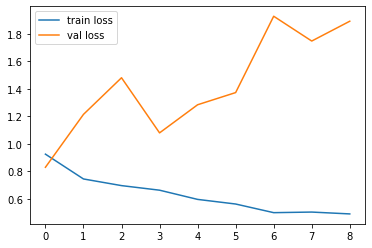

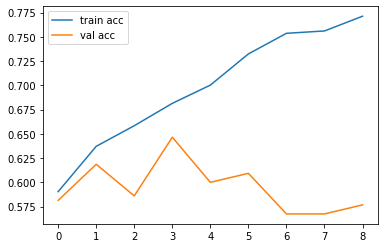

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
from tensorflow.keras.models import load_model
cnn.save('tumor_prediction.h5')


In [23]:
model=load_model('tumor_prediction.h5')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [25]:
#predict for single instance
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img('Testing/glioma_tumor/Image.jpg',target_size=(64,64))

In [26]:
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 301ms/step


In [27]:
result

array([[3.3309383]], dtype=float32)

In [28]:
test_image2=image.load_img('Testing/meningioma_tumor/Image.jpg',target_size=(64,64))

In [29]:
test_image2 = image.img_to_array(test_image2)
test_image2=test_image2/255
test_image2 = np.expand_dims(test_image2, axis = 0)
result2 = cnn.predict(test_image2)

1/1 [==============================] - 0s 21ms/step


In [30]:
result2

array([[2.833559]], dtype=float32)

In [31]:
test_image3=image.load_img('Testing/meningioma_tumor/Image(10).jpg',target_size=(64,64))

In [32]:
test_image3 = image.img_to_array(test_image3)
test_image3=test_image3/255
test_image3 = np.expand_dims(test_image3, axis = 0)
result3 = cnn.predict(test_image3)

1/1 [==============================] - 0s 21ms/step


In [33]:
result3

array([[2.5598373]], dtype=float32)

In [34]:
if result3[0]<=3:
    print("The image classified is is for patient suffering from meningioma_tumor")
else:
    print("The image classified is for patient suffering from glioma_tumor")

The image classified is is for patient suffering from meningioma_tumor


In [35]:
test_image4=image.load_img('Testing/glioma_tumor/Image(10).jpg',target_size=(64,64))

In [36]:
test_image4 = image.img_to_array(test_image4)
test_image4=test_image4/255
test_image4 = np.expand_dims(test_image4, axis = 0)
result4 = cnn.predict(test_image4)

1/1 [==============================] - 0s 23ms/step


In [37]:
result4

array([[3.9558933]], dtype=float32)

In [38]:
if result4[0]<=3:
    print("The image classified is is for patient suffering from meningioma_tumor")
else:
    print("The image classified is for patient suffering from glioma_tumor")

The image classified is for patient suffering from glioma_tumor


In [39]:
train_data2=obj_image.flow_from_directory('brain_tumor_data\Training',target_size=(64,64),batch_size=32,class_mode='binary')

Found 2870 images belonging to 4 classes.


In [40]:
test_data2=obj_image.flow_from_directory('brain_tumor_data\Testing',target_size=(64,64),batch_size=32,class_mode='binary')

Found 394 images belonging to 4 classes.


In [41]:
#sequential model
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,padding="same",kernel_size=3, activation='tanh', strides=2, input_shape=[64, 64, 3]))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(tf.keras.layers.Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 30)        8670      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 30)        8130      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 30)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 30)         

In [46]:
r=cnn.fit(x = train_data2, validation_data = test_data2, epochs = 9)

Epoch 1/9
90/90 [==============================] - 64s 713ms/step - loss: 0.3045 - accuracy: 0.2930 - val_loss: 0.2640 - val_accuracy: 0.2919
Epoch 2/9
90/90 [==============================] - 16s 175ms/step - loss: 0.2977 - accuracy: 0.2864 - val_loss: 0.2633 - val_accuracy: 0.2919
Epoch 3/9
90/90 [==============================] - 16s 175ms/step - loss: 0.2969 - accuracy: 0.2864 - val_loss: 0.2625 - val_accuracy: 0.2919
Epoch 4/9
90/90 [==============================] - 16s 180ms/step - loss: 0.2962 - accuracy: 0.2864 - val_loss: 0.2618 - val_accuracy: 0.2919
Epoch 5/9
90/90 [==============================] - 16s 178ms/step - loss: 0.2954 - accuracy: 0.2864 - val_loss: 0.2611 - val_accuracy: 0.2919
Epoch 6/9
90/90 [==============================] - 17s 193ms/step - loss: 0.2947 - accuracy: 0.2864 - val_loss: 0.2604 - val_accuracy: 0.2919
Epoch 7/9
90/90 [==============================] - 17s 190ms/step - loss: 0.2940 - accuracy: 0.2864 - val_loss: 0.2597 - val_accuracy: 0.2919
Epoch 

In [49]:
r.history['accuracy']

[0.29303136467933655,
 0.2864111363887787,
 0.2864111363887787,
 0.2864111363887787,
 0.2864111363887787,
 0.2864111363887787,
 0.2864111363887787,
 0.2864111363887787,
 0.2864111363887787]